In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
from matplotlib.collections import LineCollection
import matplotlib as mpl
from matplotlib.colors import rgb2hex
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
data = pd.read_csv('C:/Users/Kevona Jean/Desktop/DS4 Notebooks/zipcode_data.csv')
data = data.dropna()

In [3]:
data.describe()

,ZipCode,Population,Growth,Age,Income per household
count,95.000000,95.000000,95.000000,95.000000,95.000000
mean,75178.768421,31498.905263,-0.045579,33.724211,47168.126316
std,152.167493,19542.582708,0.808213,4.680419,18996.081828
min,75001.000000,254.000000,-7.740000,27.100000,0.000000
25%,75081.500000,17390.500000,0.020000,30.900000,34372.500000
50%,75203.000000,29553.000000,0.050000,32.500000,45314.000000
75%,75229.500000,44005.000000,0.065000,36.100000,57883.500000
max,76065.000000,89829.000000,0.410000,57.000000,100080.000000


In [5]:
gasinfo = pd.read_csv('C:/Users/Kevona Jean/Desktop/DS4 Notebooks/GasCode.csv').iloc[:,[1,2,3,4]]
gasinfo.columns = ['address', 'station', 'price', 'date']
gasinfo.head()

,address,station,price,date
0,4191 Belt Line Rd Addison TX 75001,Shell,2.699,1 Day Ago
1,15196 Marsh Ln Addison TX 75001,Racetrac #64,2.639,1 Day Ago
2,5012 Belt Line Rd Dallas TX 75254,Chevron,2.679,1 Day Ago
3,2220 Marsh Ln Carrollton TX 75006,Chilly Mart,2.699,1 Day Ago
4,5304 Arapaho Rd Dallas TX 75248,Exxon,2.659,1 Day Ago


In [28]:
gasinfo['ZipCode'] = gasinfo['address'].apply(lambda x: int(x[-5:]))

gasinfo.describe()

,price,ZipCode
count,1596.000000,1596.000000
mean,2.637358,75322.976817
std,0.091673,394.482877
min,2.299000,75001.000000
25%,2.599000,75062.000000
50%,2.649000,75161.500000
75%,2.699000,75243.000000
max,3.409000,78676.000000


In [27]:
gasinfo.sort_values(by = 'price')

,address,station,price,date,ZipCode
1131,3310 S Cooper St Arlington TX 76015,Racetrac #2306,2.299,1 Day Ago,76015
865,3800 N Central Expy Plano TX 75074,Costco #0664,2.309,1 Day Ago,75074
578,14205 Trinity Blvd Fort Worth TX 76155,Shell,2.339,1 Day Ago,76155
80,1701 Dallas Pkwy Plano TX 75093,Costco #0684,2.339,1 Day Ago,75093
101,8055 Churchill Way Dallas TX 75251,Costco #1266,2.359,1 Day Ago,75251
261,6185 Retail Rd Dallas TX 75231,Sams Club #6372,2.369,7 Days Ago,75231
1354,941 W Belt Line Rd Desoto TX 75115,Murphy Usa #7326 (discount Available),2.379,1 Day Ago,75115
1212,250 W Highway 67 Duncanville TX 75137,Costco #0636,2.379,1 Day Ago,75137
711,5150 N Garland Ave Garland TX 75040,Sams Club #4783 (discount Available),2.389,6 Days Ago,75040
1357,108 W Parkerville Rd Desoto TX 75123,Walmart Neighborhood Market #7232,2.389,7 Days Ago,75123


In [ ]:
avggas= gasinfo.groupby('ZipCode', as_index=False).agg({
    'station':'count',
    'price': ['mean','median','min','max']})

avggas.columns = ['ZipCode',
                  'Number of Stations',
                  'Mean Price',
                  'Median Price',
                  'Min Price',
                  'Max Price']

In [31]:
gasdata = pd.merge(data, avggas, on='ZipCode')
gasdata = gasdata.drop(90) #dropped a zipcode with income per household = 0
gasdata.sort_values(by = 'Income per household')
gasdata.head()

,ZipCode,City,Population,Growth,Age,Income per household,Number of Stations,Mean Price,Median Price,Min Price,Max Price
0,75001,Addison TX,13825.0,0.10,32.0,57064,8,2.642750,2.669,2.409,2.799
1,75006,Carrollton TX,48827.0,0.05,34.0,52798,16,2.704000,2.699,2.649,2.799
2,75007,Carrollton TX,53428.0,0.03,37.6,70081,12,2.694000,2.699,2.599,2.759
3,75019,Coppell TX,40062.0,0.03,37.7,96840,8,2.676500,2.679,2.479,2.899
4,75028,Flower Mound TX,43154.0,0.02,38.0,91855,13,2.600538,2.599,2.489,2.699


In [13]:
gasdata.describe()

,ZipCode,Population,Growth,Age,Income per household,Number of Stations,Mean Price,Median Price,Min Price,Max Price
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,75179.301075,31818.559140,-0.051505,33.777419,48182.494624,11.096774,2.653061,2.651796,2.553946,2.761151
std,153.059791,19594.368299,0.815486,4.715334,17868.678495,7.532631,0.068632,0.059730,0.094462,0.132778
min,75001.000000,254.000000,-7.740000,27.100000,15058.000000,1.000000,2.512636,2.529000,2.359000,2.579000
25%,75082.000000,17654.000000,0.020000,30.900000,35135.000000,5.000000,2.611500,2.599000,2.499000,2.699000
50%,75203.000000,29560.000000,0.050000,32.500000,45919.000000,10.000000,2.651500,2.659000,2.549000,2.699000
75%,75229.000000,44128.000000,0.060000,36.500000,58257.000000,14.000000,2.680667,2.689000,2.639000,2.799000
max,76065.000000,89829.000000,0.180000,57.000000,100080.000000,35.000000,2.976500,2.899000,2.799000,3.409000


In [14]:
gasdata.to_csv('gasdata.csv')

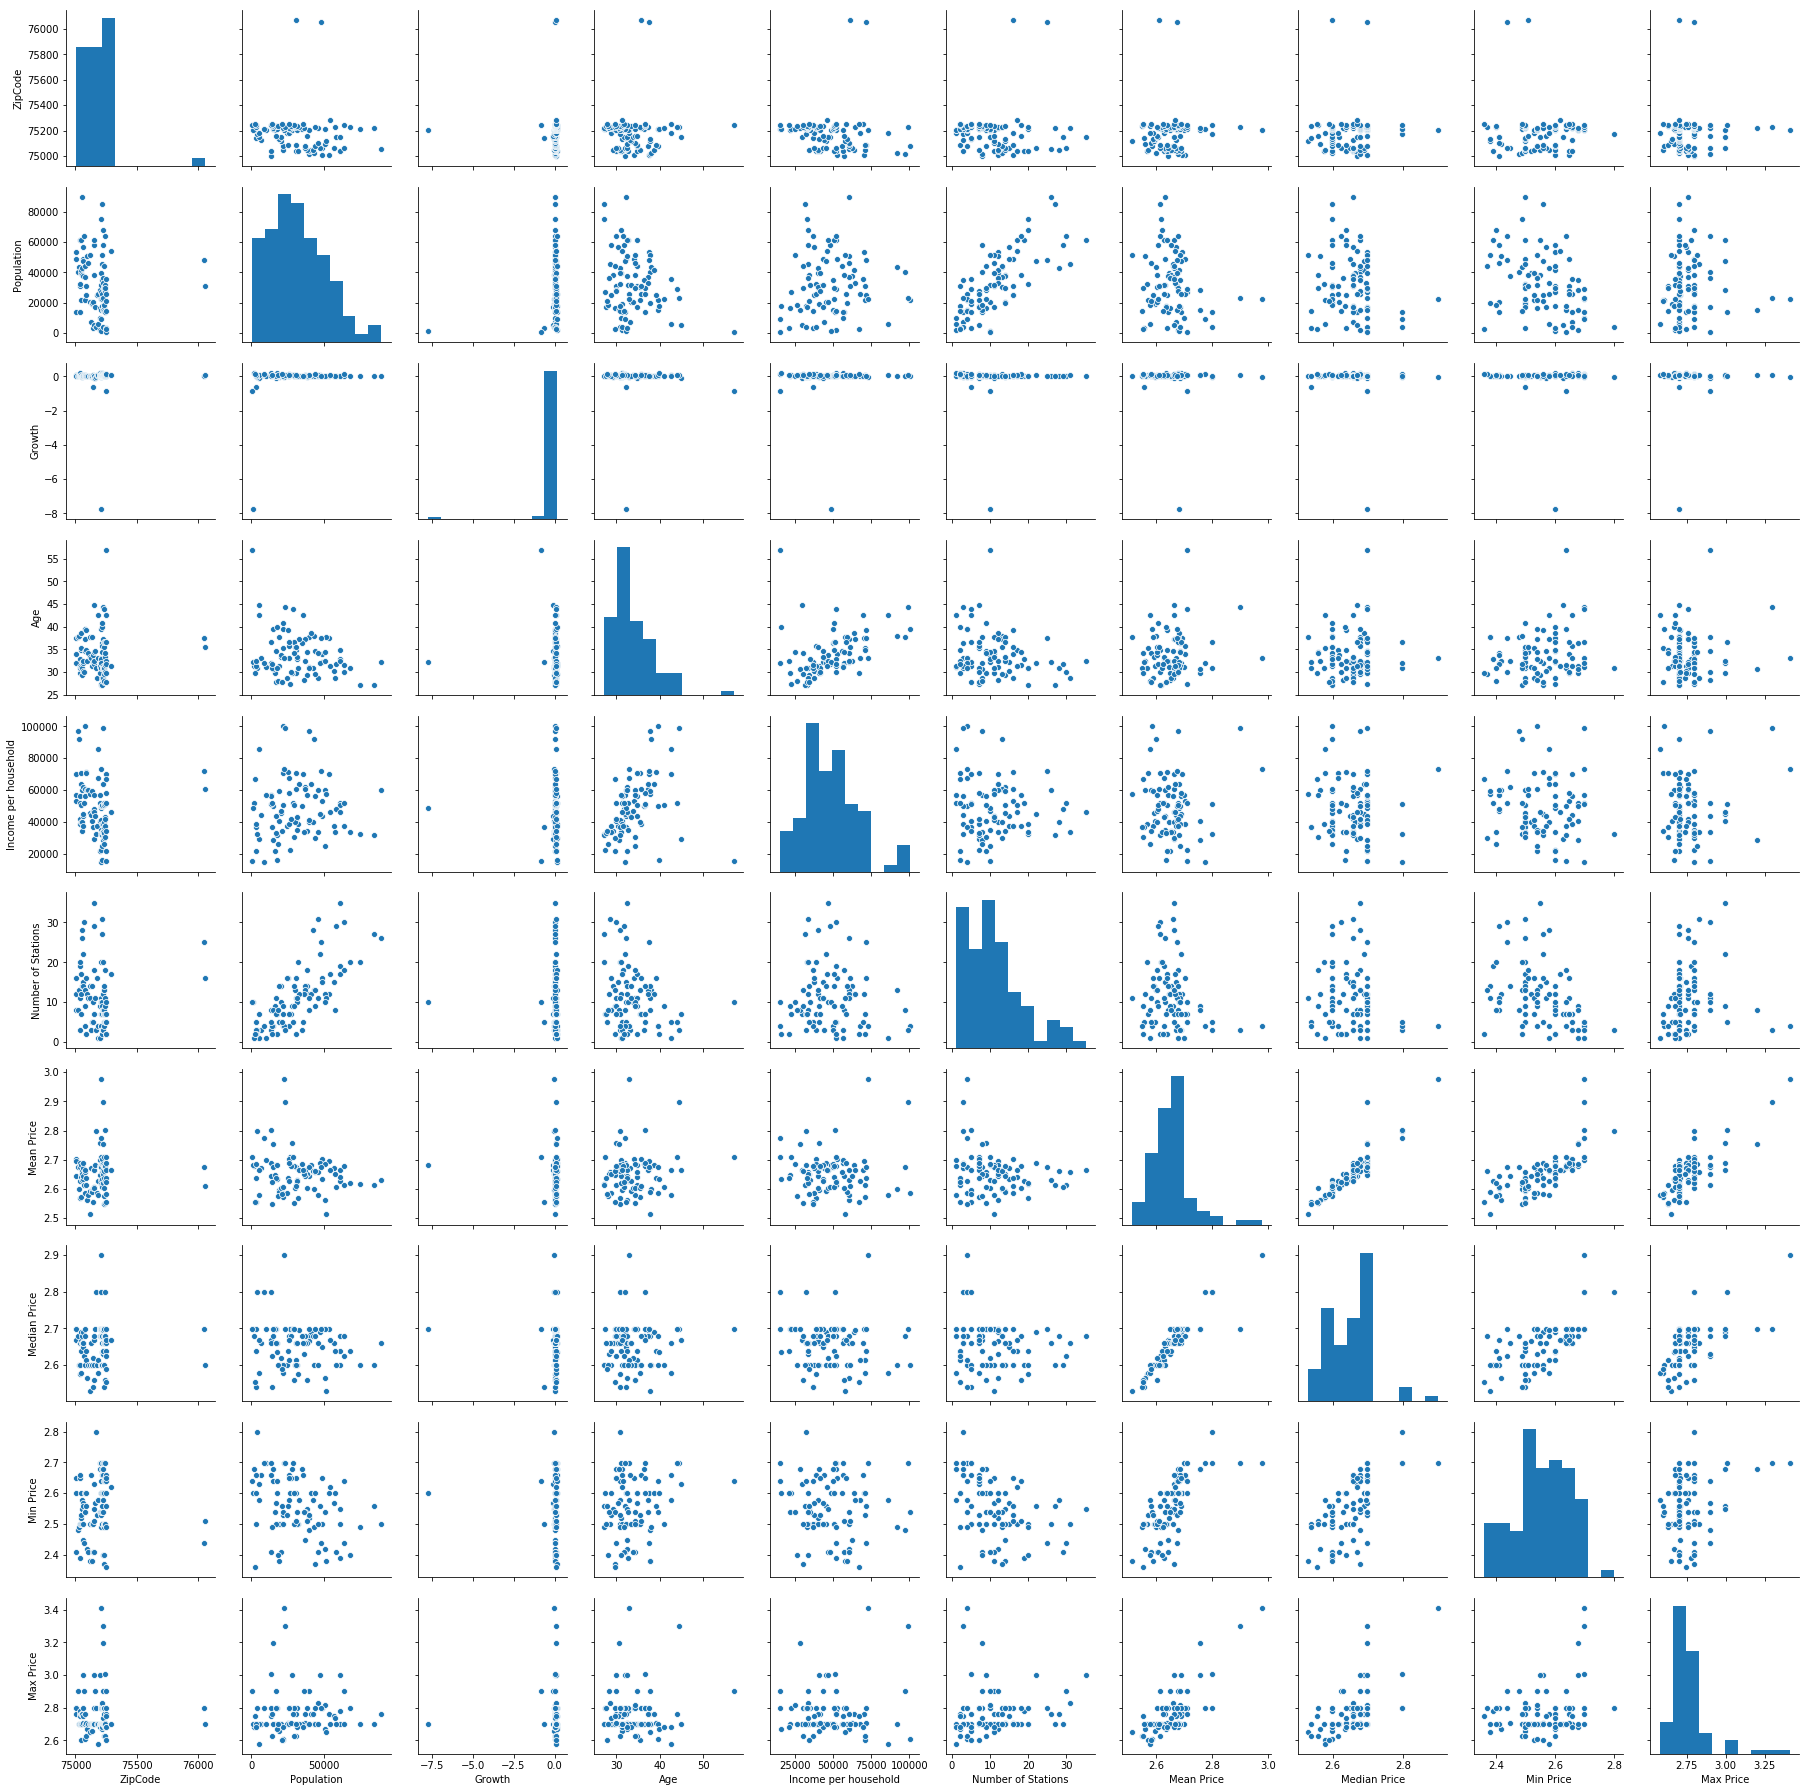

In [15]:
import seaborn as sns
sns.pairplot(gasdata)

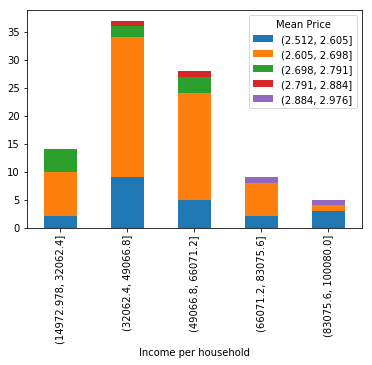

In [34]:
income_grps= pd.cut(gasdata['Income per household'], 5)
gas_grps=pd.cut(gasdata['Mean Price'], 5)
ct=pd.crosstab(income_grps, gas_grps)
ct.plot.bar(stacked=True)

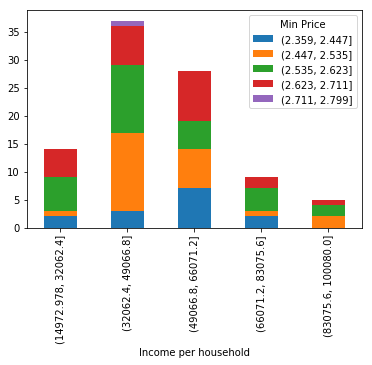

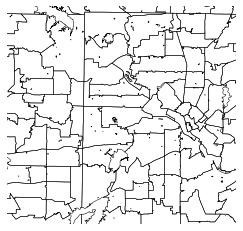

In [19]:
#Creat Map Background of Dallas County Zipcodes
#westlimit=-97.038403; southlimit=32.545349; eastlimit=-96.516882; northlimit=32.988773
#32.7767° N, 96.7970° W
gasdata= pd.read_csv('C:/Users/Kevona Jean/Desktop/DS4 Notebooks/gasdata.csv')
Zipcode = gasdata['Zipcodes'].values
MeanPrice = gasdata['Mean Price'].values

m = Basemap(resolution='l', # c, l, i, h, f or None
            projection='lcc',
            lat_0=32.7767, lon_0=-96.7970,
            llcrnrlon=-97.2, llcrnrlat= 32.6, urcrnrlon=-96.7, urcrnrlat=33)

shp_info = m.readshapefile('C:/Users/Kevona Jean/Desktop/txzc/TG00TXZCTA', 'txzc', drawbounds = True)

plt.gca().axis("off")
plt.show()